# **Rock Paper Scissors Image Classifier**

Dicoding x IBM Indonesia New Collar and Skill Acceleration Center

<a href="https://colab.research.google.com/drive/16o_LtFxxgeBip6-vMLAqqH6qIty1zgdD?usp=sharing" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submission for Dicoding Beginner Machine Learning Class**

*by: Ulya Habiburrahman*


---



# 1. Importing library and fetching dataset from server



In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os, shutil, zipfile

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-29 07:28:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.07MB/s    in 47s     

2020-10-29 07:29:38 (6.59 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# 2. Dataset extraction, pathing, and splitting

In [3]:
# dataset extraction
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# dataset pathing
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')
print('total rock images:', len(os.listdir(roc_dir)))
print('total paper images:', len(os.listdir(pap_dir)))
print('total scissors images:', len(os.listdir(sci_dir)))

total rock images: 726
total paper images: 712
total scissors images: 750


In [5]:
if os.path.exists(train_dir):
  shutil.rmtree(train_dir)

if os.path.exists(validation_dir):
  shutil.rmtree( validation_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [6]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [7]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [8]:
# split each directory to train data and validation data (validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

# 3. Image generate and Augmentation

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    rotation_range=40,
    fill_mode='nearest',
    validation_split = 0.2
)
valid_datagen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    rotation_range=40,
    fill_mode='nearest',
    validation_split = 0.2
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# 4. Create and train model

In [11]:
# Model Architecture
model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
# Model Optimizer and Loss Function
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
# Callback function to stop training when accuracy exceed 97%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAccuracy above 97% is obtained, training is STOPPED.")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # steps = 1312 images / 32 batch_size
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # steps = 876 images / 32 batch_size
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
41/41 - 16s - loss: 1.1034 - accuracy: 0.3506 - val_loss: 1.0927 - val_accuracy: 0.3333
Epoch 2/20
41/41 - 16s - loss: 0.9326 - accuracy: 0.5373 - val_loss: 0.7002 - val_accuracy: 0.6447
Epoch 3/20
41/41 - 15s - loss: 0.5501 - accuracy: 0.7706 - val_loss: 0.4472 - val_accuracy: 0.8206
Epoch 4/20
41/41 - 15s - loss: 0.4456 - accuracy: 0.8255 - val_loss: 0.3375 - val_accuracy: 0.8681
Epoch 5/20
41/41 - 15s - loss: 0.3628 - accuracy: 0.8575 - val_loss: 0.3317 - val_accuracy: 0.8669
Epoch 6/20
41/41 - 15s - loss: 0.3352 - accuracy: 0.8727 - val_loss: 0.3672 - val_accuracy: 0.8588
Epoch 7/20
41/41 - 15s - loss: 0.3093 - accuracy: 0.8841 - val_loss: 0.2656 - val_accuracy: 0.8970
Epoch 8/20
41/41 - 15s - loss: 0.2795 - accuracy: 0.9055 - val_loss: 0.2333 - val_accuracy: 0.9132
Epoch 9/20
41/41 - 15s - loss: 0.2167 - accuracy: 0.9238 - val_loss: 0.1906 - val_accuracy: 0.9294
Epoch 10/20
41/41 - 16s - loss: 0.2282 - accuracy: 0.9192 - val_loss: 0.2314 - val_accuracy: 0.9120
Epoch 11/

# 5. Model Evaluation Graph

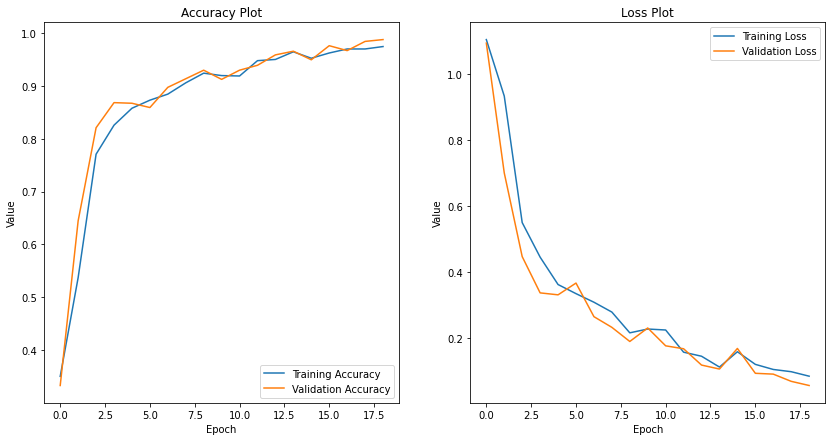

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14, 7))
# Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

# Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# 6. Upload Form

Saving test1.png to test1.png
test1.png
scissors


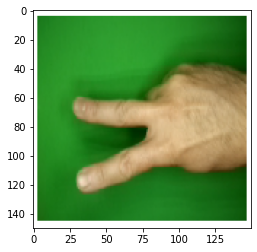

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

# 7. Export Model

In [18]:
model.save("rps_model.h5",include_optimizer=False)